In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import sklearn as sk
import io
import seaborn as sns
from sklearn import metrics as ms 
import time


In [4]:
tf.__version__

'2.10.0'

In [ ]:
uploaded = files.upload()

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

# Carregando a Base de Dados



In [246]:
dataset = pd.read_csv("condition_total.csv")
dataset


C:\Users\marce\AppData\Local\Temp\ipykernel_18164\2218602655.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("condition_total.csv")


,number,timestamp,time,date,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,activity,disorder
0,23,2004-02-28,17:26:00,2004-02-28,13,1,20-24,0,0,0,0,0,0,0,0,174,0
1,23,2004-02-28,17:27:00,2004-02-28,13,1,20-24,0,0,0,0,0,0,0,0,47,0
2,23,2004-02-28,17:28:00,2004-02-28,13,1,20-24,0,0,0,0,0,0,0,0,57,0
3,23,2004-02-28,17:29:00,2004-02-28,13,1,20-24,0,0,0,0,0,0,0,0,137,0
4,23,2004-02-28,17:30:00,2004-02-28,13,1,20-24,0,0,0,0,0,0,0,0,99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660061,9,2003-11-19,20:55:00,2003-11-19,13,2,30-34,0,0,0,0,0,0,0,0,0,0
1660062,9,2003-11-19,20:56:00,2003-11-19,13,2,30-34,0,0,0,0,0,0,0,0,0,0
1660063,9,2003-11-19,20:57:00,2003-11-19,13,2,30-34,0,0,0,0,0,0,0,0,16,0
1660064,9,2003-11-19,20:58:00,2003-11-19,13,2,30-34,0,0,0,0,0,0,0,0,0,0


In [247]:
y_y=dataset.iloc[:,16:17]
print(y_y)


         disorder
0               0
1               0
2               0
3               0
4               0
...           ...
1660061         0
1660062         0
1660063         0
1660064         0
1660065         0

[1660066 rows x 1 columns]


In [ ]:
np.unique(dataset,return_counts=True)

# Pré-processamento da base de dados

1. Remoção de linhas nulas
2. Separação dos dados em X (variáveis independentes) e y (variável dependente)
3. Transformação das variáveis categóricas em numéricas (LabelEncoder e OneHotEncoder)
4. Separação em Teste e Treino
5. Normalização

In [248]:
import datetime

#Separar time em Hora, Minuto, Segundo

df = pd.DataFrame({'time': pd.to_datetime(dataset["time"],errors='coerce')})
dataset['hour'] = df['time'].dt.hour
dataset['minute'] = df['time'].dt.minute
dataset['second'] = df['time'].dt.second
dataset.drop(["time","second"], axis=1, inplace=True)


print(dataset)

         number   timestamp        date  days  gender    age  afftype  \
0            23  2004-02-28  2004-02-28    13       1  20-24        0   
1            23  2004-02-28  2004-02-28    13       1  20-24        0   
2            23  2004-02-28  2004-02-28    13       1  20-24        0   
3            23  2004-02-28  2004-02-28    13       1  20-24        0   
4            23  2004-02-28  2004-02-28    13       1  20-24        0   
...         ...         ...         ...   ...     ...    ...      ...   
1660061       9  2003-11-19  2003-11-19    13       2  30-34        0   
1660062       9  2003-11-19  2003-11-19    13       2  30-34        0   
1660063       9  2003-11-19  2003-11-19    13       2  30-34        0   
1660064       9  2003-11-19  2003-11-19    13       2  30-34        0   
1660065       9  2003-11-19  2003-11-19    13       2  30-34        0   

         melanch  inpatient edu  marriage  work  madrs1  madrs2  activity  \
0              0          0   0         0     

In [249]:
import datetime

#Separar timestamp em Dia, Mês, Ano

df = pd.DataFrame({'timestamp': pd.to_datetime(dataset["timestamp"],errors='coerce')})
dataset['day'] = df['timestamp'].dt.day
dataset['Month'] = df['timestamp'].dt.month 
dataset['Year'] = df['timestamp'].dt.year 

dataset.drop(["timestamp", "date"], axis=1, inplace=True)


print(dataset)


         number  days  gender    age  afftype  melanch  inpatient edu  \
0            23    13       1  20-24        0        0          0   0   
1            23    13       1  20-24        0        0          0   0   
2            23    13       1  20-24        0        0          0   0   
3            23    13       1  20-24        0        0          0   0   
4            23    13       1  20-24        0        0          0   0   
...         ...   ...     ...    ...      ...      ...        ...  ..   
1660061       9    13       2  30-34        0        0          0   0   
1660062       9    13       2  30-34        0        0          0   0   
1660063       9    13       2  30-34        0        0          0   0   
1660064       9    13       2  30-34        0        0          0   0   
1660065       9    13       2  30-34        0        0          0   0   

         marriage  work  madrs1  madrs2  activity  disorder  hour  minute  \
0               0     0       0       0       

In [250]:

dataset.drop(["number"], axis=1, inplace=True)

In [251]:
dataset[dataset.isnull().any(axis=1)]  #quantas linhas nulas?
dataset = dataset.dropna() 
dataset

,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,activity,disorder,hour,minute,day,Month,Year
0,13,1,20-24,0,0,0,0,0,0,0,0,174,0,17,26,28,2,2004
1,13,1,20-24,0,0,0,0,0,0,0,0,47,0,17,27,28,2,2004
2,13,1,20-24,0,0,0,0,0,0,0,0,57,0,17,28,28,2,2004
3,13,1,20-24,0,0,0,0,0,0,0,0,137,0,17,29,28,2,2004
4,13,1,20-24,0,0,0,0,0,0,0,0,99,0,17,30,28,2,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660061,13,2,30-34,0,0,0,0,0,0,0,0,0,0,20,55,19,11,2003
1660062,13,2,30-34,0,0,0,0,0,0,0,0,0,0,20,56,19,11,2003
1660063,13,2,30-34,0,0,0,0,0,0,0,0,16,0,20,57,19,11,2003
1660064,13,2,30-34,0,0,0,0,0,0,0,0,0,0,20,58,19,11,2003


In [252]:
# Deletando a variável y_y
dataset=dataset.drop(columns=['disorder'])
dataset.head()




,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,activity,hour,minute,day,Month,Year
0,13,1,20-24,0,0,0,0,0,0,0,0,174,17,26,28,2,2004
1,13,1,20-24,0,0,0,0,0,0,0,0,47,17,27,28,2,2004
2,13,1,20-24,0,0,0,0,0,0,0,0,57,17,28,28,2,2004
3,13,1,20-24,0,0,0,0,0,0,0,0,137,17,29,28,2,2004
4,13,1,20-24,0,0,0,0,0,0,0,0,99,17,30,28,2,2004


In [253]:

x_x=dataset.iloc[:,0:]
print(x_x)

         days  gender    age  afftype  melanch  inpatient edu  marriage  work  \
0          13       1  20-24        0        0          0   0         0     0   
1          13       1  20-24        0        0          0   0         0     0   
2          13       1  20-24        0        0          0   0         0     0   
3          13       1  20-24        0        0          0   0         0     0   
4          13       1  20-24        0        0          0   0         0     0   
...       ...     ...    ...      ...      ...        ...  ..       ...   ...   
1660061    13       2  30-34        0        0          0   0         0     0   
1660062    13       2  30-34        0        0          0   0         0     0   
1660063    13       2  30-34        0        0          0   0         0     0   
1660064    13       2  30-34        0        0          0   0         0     0   
1660065    13       2  30-34        0        0          0   0         0     0   

         madrs1  madrs2  ac

In [ ]:
#Analise da matriz de correlações dos dados.

# Cálculo da matriz de correlações

corr = dataset.iloc[:,0:].corr()
corr

In [ ]:
# Mapa de calor das correlações

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [254]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder 

#https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),['edu','age'])], remainder ='passthrough')
x_x = ct.fit_transform(x_x.astype(str))

x_x

array([[1.0, 0.0, 0.0, ..., '28', '2', '2004'],
       [1.0, 0.0, 0.0, ..., '28', '2', '2004'],
       [1.0, 0.0, 0.0, ..., '28', '2', '2004'],
       ...,
       [1.0, 0.0, 0.0, ..., '19', '11', '2003'],
       [1.0, 0.0, 0.0, ..., '19', '11', '2003'],
       [1.0, 0.0, 0.0, ..., '19', '11', '2003']], dtype=object)

In [255]:
colunas = ['ohe1', 'ohe2', 'ohe3','ohe4', 'ohe5', 'ohe6','ohe7', 'ohe8', 'ohe9','ohe10','ohe11','ohe12','ohe13','days','gender','age','afftype','melanch','inpatient','edu','marriage','work','madrs1','madrs2','activity','hour','minute','day','Month','Year']
pd.DataFrame(x_x, columns=colunas)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,...,marriage,work,madrs1,madrs2,activity,hour,minute,day,Month,Year
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,174,17,26,28,2,2004
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,47,17,27,28,2,2004
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,57,17,28,28,2,2004
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,137,17,29,28,2,2004
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,99,17,30,28,2,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,20,55,19,11,2003
1660062,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,20,56,19,11,2003
1660063,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,16,20,57,19,11,2003
1660064,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,20,58,19,11,2003


# Verificação distribuição dos dados

In [ ]:
fig=plt.figure(figsize=(15,20))

ax=fig.gca()

dataset.hist(ax=ax)

In [ ]:


#Analise da matriz de correlações dos dados.

# Cálculo da matriz de correlações

corr = dataset.iloc[:,0:].corr()
corr

# Mapa de calor das correlações

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="YlGnBu")

In [ ]:
len(dataset.columns)

In [256]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_x,y_y,test_size = 0.30,random_state=100000)



# Normalização

In [141]:
#Normalização para ser utilizada na regressão logística
from sklearn.preprocessing import MinMaxScaler
normalizador=MinMaxScaler (feature_range=(0,1))
x_x=normalizador.fit_transform(x_x)

x_x

array([[1.        , 0.        , 0.        , ..., 0.9       , 0.09090909,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.9       , 0.09090909,
        0.5       ],
       [1.        , 0.        , 0.        , ..., 0.9       , 0.09090909,
        0.5       ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.6       , 0.90909091,
        0.25      ],
       [1.        , 0.        , 0.        , ..., 0.6       , 0.90909091,
        0.25      ],
       [1.        , 0.        , 0.        , ..., 0.6       , 0.90909091,
        0.25      ]])

In [ ]:
#Este gráfico nos diz que existem muito menos casos de pessoas que poderão ter transtorno.
# Este fato nos diz que a amostra está totalmente desbalanceada

sns.countplot (x='disorder',data=y_y)

In [ ]:
#Normalização Rede Neural
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train


# Utilizando Regressão Logística

c:\Users\marce\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\marce\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tempo de treino 6.954428199969698
Score utilizando Regressão Logistica 0.6070056471245179
Matriz de Confusão


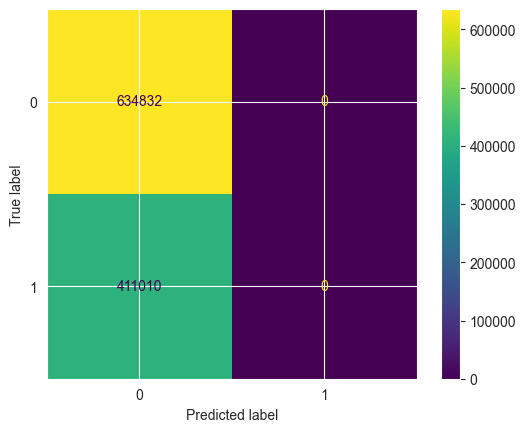

In [182]:

from sklearn.linear_model import LogisticRegression 
import time

model= LogisticRegression(solver='liblinear',max_iter=1)
start_time=time.perf_counter()
model.fit(x_train,y_train)
end_time=time.perf_counter()

print("Tempo de treino",end_time-start_time)

print("Score utilizando Regressão Logistica", model.score(x_test,y_test))




#Matriz de Confusão 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print("Matriz de Confusão")
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression 
import time

model= LogisticRegression(solver='lbfgs',max_iter=10000)
start_time=time.perf_counter()
model.fit(x_train,y_train)
end_time=time.perf_counter()

print("Tempo de treino",end_time-start_time)

print("Score utilizando Regressão Logistica", model.score(x_test,y_test))




#Matriz de Confusão 
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print("Matriz de Confusão")
ConfusionMatrixDisplay.from_estimator(model,x_test,y_test)

# Arquitetura de Rede Neural (MLP)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import SGD

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=17,activation='relu',kernel_initializer='he_normal'))
ann.add(Dropout(0.50))
ann.add(tf.keras.layers.Dense(units=10, activation='relu',kernel_initializer='he_normal'))
ann.add(Dropout(0.50))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
sgd=SGD(lr=0.01, decay=1e-6,momentum=0.9,nesterov=True)
# inicio da contagem do tempo para treino
t0 = time.time ()
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    


c:\Users\marce\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Executando treinamento

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session
clear_session()

In [ ]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [ ]:
history=ann.fit(x_train, y_train,batch_size=128, epochs=16)
t1 = time.time ()



Epoch 1/16
9079/9079 [==============================] - 18s 2ms/step - loss: 0.0584 - accuracy: 0.9820
Epoch 2/16
9079/9079 [==============================] - 17s 2ms/step - loss: 0.0569 - accuracy: 0.9820
Epoch 3/16
9079/9079 [==============================] - 17s 2ms/step - loss: 0.0553 - accuracy: 0.9821
Epoch 4/16
9079/9079 [==============================] - 18s 2ms/step - loss: 0.0552 - accuracy: 0.9821
Epoch 5/16
9079/9079 [==============================] - 19s 2ms/step - loss: 0.0554 - accuracy: 0.9821
Epoch 6/16
9079/9079 [==============================] - 18s 2ms/step - loss: 0.0551 - accuracy: 0.9822
Epoch 7/16
9079/9079 [==============================] - 18s 2ms/step - loss: 0.0554 - accuracy: 0.9821
Epoch 8/16
9079/9079 [==============================] - 18s 2ms/step - loss: 0.0553 - accuracy: 0.9821
Epoch 9/16
5555/9079 [=================>............] - ETA: 7s - loss: 0.0555 - accuracy: 0.9820

KeyboardInterrupt: 

In [ ]:
from sklearn import metrics

y_hat_train = ann.predict(x_train)
print(metrics.r2_score(y_train, y_hat_train))

y_hat_test = ann.predict(x_test)
print(metrics.r2_score(y_test, y_hat_test))

36314/36314 [==============================] - 56s 2ms/step
0.9999973338308437
15564/15564 [==============================] - 17s 1ms/step
0.986366745214192


In [ ]:
from keras import backend as K

In [ ]:
history=ann.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=10, epochs=10)
t1 = time.time ()

In [ ]:
#Mostrando o loss e acuracia durante o treinamento

plt.figure()
plt.subplot(2,1,1)
plt.title('Loss X Acurácia')
plt.plot(history.history['loss'])
plt.ylabel('loss');plt.xlabel('epoch')
plt.legend(['Loss'], loc='upper right')
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia');plt.xlabel('epoch')
plt.legend(["acurácia"],loc='lower right')

plt.show()

In [ ]:
loss, accuracy = ann.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = ann.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:


import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.tight_layout()

plt.show()

In [34]:
print(ann.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                102       
                                                                 
 dropout (Dropout)           (None, 17)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                180       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 293
Trainable params: 293
Non-trainable params: 0
_________________________________________________________________
None


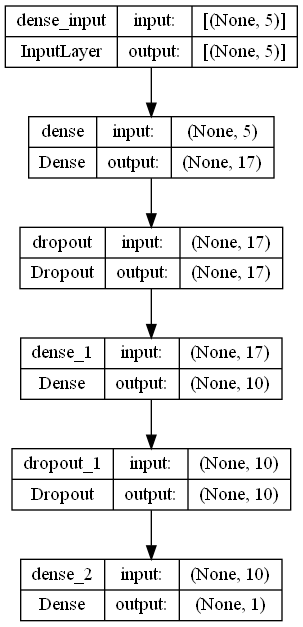

In [35]:
from keras.utils.vis_utils import pydot
from keras.utils.vis_utils import plot_model

plot_model(ann, to_file='model.png', show_shapes=True, show_layer_names=True)




import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = ground truth labels
y_probas =  predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_test, y_pred)
plt.show()

In [26]:
#Realizando as previsões e avaliação do modelo
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)#se y_pred for maior que 0,5 retorna true(1) outra coisa falsa(2)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)
print('data pred=',np.concatenate([pred_array, test_array], axis=1))

#y_pred = np.asarray(y_pred).astype(np.int32)
#y_test = np.asarray(y_test).astype(np.int32)

15564/15564 [==============================] - 15s 927us/step
data pred= [[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


In [34]:
#Mostrando os resultados dos testes

loss, accuracy = ann.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.2f}".format(accuracy))
loss, accuracy = ann.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.2f}".format(accuracy))




Training Accuracy: 1.00
Testing Accuracy:  1.00


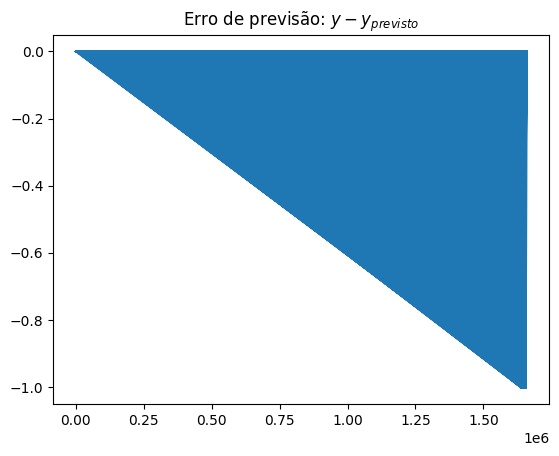

In [37]:
plt.figure()
plt.plot(y_test-np.around(y_pred))
plt.title("Erro de previsão: $y-y_{previsto}$")
plt.show()

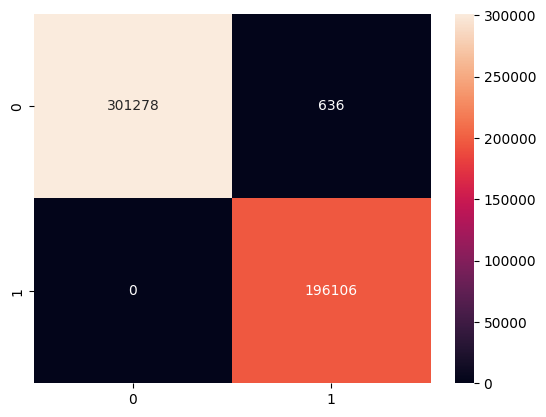

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)    #vn (rede disse que é 1, mas é de fato 1 ), fp(rede disse que é 1, mas é 0), fn (rede disse que é 0, mas é 1)
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred).std()





In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(ann, x_x, y_y, cv=kfold)
print(results.std())

In [ ]:
score=ann.evaluate(x_test,y_test,batch_size=200)

print()

In [ ]:
print("second: ",(t1-t0),",",ann.metrics_names[1],score[1]*100)


In [ ]:
t0


In [ ]:
t1

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    301914
           1       0.99      1.00      1.00    196106

    accuracy                           1.00    498020
   macro avg       1.00      1.00      1.00    498020
weighted avg       1.00      1.00      1.00    498020



In [ ]:
dataset['disorder'].value_counts()

# GridSearch na MLP

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# creado o modelo
model = KerasClassifier(build_fn=create_model, verbose=1)

In [ ]:
import subprocess
print((subprocess.check_output("lscpu", shell=True).strip()).decode())

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [ ]:

import multiprocessing
n_jobs = multiprocessing.cpu_count()-1
optimizer = ['SGD', 'Adam']
batch_size = [10]
epochs = [32,64]
param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=None,cv=2)
grid_result = grid.fit(x_train, y_train)

# Resultado de performace

In [ ]:
# summarize results

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
Best: 1.000000 using {'batch_size': 64, 'epochs': 40, 'optimizer': 'Adam'}
0.999998 (0.000002) with: {'batch_size': 64, 'epochs': 40, 'optimizer': 'SGD'}
1.000000 (0.000000) with: {'batch_size': 64, 'epochs': 40, 'optimizer': 'Adam'}
0.999997 (0.000002) with: {'batch_size': 64, 'epochs': 50, 'optimizer': 'SGD'}
1.000000 (0.000000) with: {'batch_size': 64, 'epochs': 50, 'optimizer': 'Adam'}
0.999992 (0.000010) with: {'batch_size': 128, 'epochs': 40, 'optimizer': 'SGD'}
1.000000 (0.000000) with: {'batch_size': 128, 'epochs': 40, 'optimizer': 'Adam'}
0.997432 (0.005129) with: {'batch_size': 128, 'epochs': 50, 'optimizer': 'SGD'}
0.997409 (0.005180) with: {'batch_size': 128, 'epochs': 50, 'optimizer': 'Adam'}

# Análise de Overfitting

In [32]:
y_pred_metrics_train = ann.predict(x_train)
y_pred_metrics_test = ann.predict(x_test)

15564/15564 [==============================] - 15s 953us/step


In [39]:
# Métrica de Performace
from sklearn.metrics import mean_absolute_error

#Treinamento - MAE, MAPE   -- Erro médio absoluto ----  Erro Percentual Médio Absoluto (%)

mae_train= mean_absolute_error (y_train,y_pred_metrics_train) 
mape_train=np.mean(np.abs((y_train-y_pred_metrics_train)/y_train))


#teste - MAE, MAPE

mae_test= mean_absolute_error (y_test,y_pred_metrics_test) 
mape_test=np.mean(np.abs((y_test-y_pred_metrics_test)/y_test))

print(mape_train)

disorder    inf
dtype: float64


c:\Users\marce\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\marce\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
data={
    
      'Dataframe':['treino', 'teste'],
      'MAE':[mae_train,mae_test],'MAPE':[mape_train,mape_test]}

pd.DataFrame(data)

# Visualizando os dados

In [ ]:
dataset_score = pd.read_csv(r"scores.csv")
dataset_score

In [ ]:
plt.scatter(dataset_score["age"], dataset_score["disorder"],color='blue')
plt.scatter(dataset["disorder"],dataset["activity"],color='coral')
plt.xlabel('Atividade Motora- Transtorno Depressivo Maior')
plt.ylabel('Transtorno (Ausência, Presença')


In [ ]:

dataset2 = pd.read_csv(r"condition_total.csv")
dataset2

import plotly.express as px
fig  = px.scatter(dataset2, x = 'number', y = 'activity', log_x = True, width = 900)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Registo de actigrafia x  Controle e Caso')
fig.update_xaxes(title = 'Atividade Motora')
fig.update_yaxes(title = 'Controles e Casos')
fig.show()

# Classificador com PCA 

In [257]:
from sklearn.decomposition import PCA

In [258]:
#Análise para verificar a variabilidade de dados 

pca=PCA(n_components=5)

In [259]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [260]:
x_train=pca.fit_transform(x_train)
x_test=pca.fit_transform(x_test)

In [261]:
pca.components_.shape

#Coeficiente da componentes principais 

#Cada linha representa a cada entrada de uma componente 

(5, 30)

In [262]:
# Pesos das componentes principais

pca.components_[0,:]

#As entradas são os coeficientes da combinação linear das variáveis originais
# que dão origem a primeira componente principal

array([-3.14376636e-01,  1.38075295e-01,  1.18240991e-01,  1.97694670e-01,
       -5.37155034e-02, -3.24229951e-02, -7.87099947e-02, -9.64533433e-02,
       -8.02454358e-02, -4.14546221e-02,  3.95658147e-03,  2.66177376e-01,
       -8.49232873e-02, -4.15523282e-02, -2.81360741e-03,  4.51626367e-02,
        2.11840576e-01,  3.10511046e-01,  3.02273267e-01,  3.06297996e-01,
        3.05182793e-01,  3.19585687e-01,  3.13762679e-01,  3.12784656e-01,
       -7.96830431e-03,  7.40386925e-04,  1.78987391e-04,  1.49249851e-02,
        2.86489020e-02,  2.12551172e-02])

In [263]:
#Variância das componentes principais
pca.explained_variance_ratio_




array([0.31110549, 0.06557709, 0.05352109, 0.04597918, 0.04428349])

In [264]:
np.round(pca.explained_variance_ratio_,3)

array([0.311, 0.066, 0.054, 0.046, 0.044])

In [ ]:
X_train=pca.fit_transform(x_train)
X_test=pca.transform(x_test)

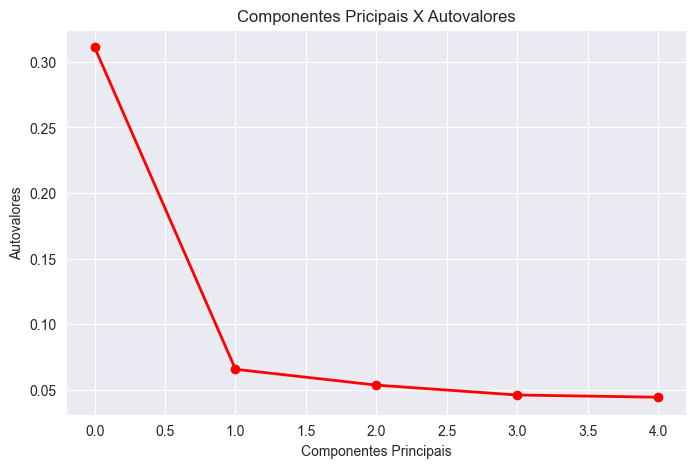

In [268]:
fig = plt.figure(figsize=(8,5))

plt.plot(pca.explained_variance_ratio_,  'ro-', linewidth=2)
plt.title('Componentes Pricipais X Autovalores')
plt.xlabel('Componentes Principais')
plt.ylabel('Autovalores')

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression 
import time

model= LogisticRegression(solver='saga',max_iter=1000)
start_time=time.perf_counter()
model.fit(X_train,y_train)
end_time=time.perf_counter()

print("Tempo de treino",end_time-start_time)

print("Score utilizando Regressão Logistica", model.score(X_test,y_test))



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(X_test,y_test)    #vn (rede disse que é 1, mas é de fato 1 ), fp(rede disse que é 1, mas é 0), fn (rede disse que é 0, mas é 1)
IC = type('IdentityClassifier', (), {"predict": lambda i : i, "_estimator_type": "classifier"})
f = sns.heatmap(cm, annot=True, fmt='d')

In [ ]:

model.score(X_test, y_test)

# Visualização PCA


In [226]:
from sklearn.decomposition import PCA
pca_viewer= PCA(n_components=5)
principal_components=pca_viewer.fit_transform(x_train)

# Porcentagem de variação explicada para cada componente sobre a componente original 

print(pca_viewer.explained_variance_ratio_)



[0.59888879 0.12566472 0.10273901 0.08905123 0.08365626]


In [ ]:
principal_components_df=pd.DataFrame(data=principal_components,columns=['principal component 1','principal component 2' ] )
#, 'principal component 3','principal component 4','principal component 5','principal component 6' , 'principal component 7','principal component 8','principal component 9','principal component 10'
principal_components_df

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    301914
           1       0.99      1.00      1.00    196106

    accuracy                           1.00    498020
   macro avg       1.00      1.00      1.00    498020
weighted avg       1.00      1.00      1.00    498020



In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    palette=sns.color_palette("hls", 256),
    data=principal_components_df,alpha=0.3
)

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1', fontsize=20)
plt.ylabel('Principal Component - 2', fontsize=20)
plt.xlim(-2500, 2500)
plt.ylim(-1500, 1500)
plt.title("Principal Component Analysis - Stellar",fontsize=20)
targets = [0, 1]
colors = ['r','g']

for target, color in zip(targets,colors):
    indicesToKeep = y_train == targets
    plt.scatter(principal_components_df.loc[indicesToKeep, 'principal component 1'], 
                principal_components_df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 25, alpha=0.5)

plt.legend(targets,prop={'size': 15})
plt.show()

# Random Forest 

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix



from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_x,y_y,test_size = 0.3)

forest_model=RandomForestClassifier( min_impurity_decrease=10,
                             max_features=5,
                             bootstrap=False,
                             random_state=400,
                             criterion='entropy',
                             warm_start=False)

forest_model.fit(x_train,y_train)
predict_forest=forest_model.predict(x_test)

print(np.sqrt(mean_squared_error(y_test,predict_forest)))



print(accuracy_score(y_test,predict_forest))
print(recall_score(y_test,predict_forest))
print(confusion_matrix(y_test,predict_forest))



print(mean_absolute_error(y_test,predict_forest))



C:\Users\marce\AppData\Local\Temp\ipykernel_18164\177469153.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(x_train,y_train)


0.6273968138087973
0.6063732380225694
0.0
[[301986      0]
 [196034      0]]
0.39362676197743063
